In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io
import skimage

from skimage import filters

import skimage.morphology as morpho
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! git clone --recursive https://github.com/torresbf/ImagesTelecom

fatal: destination path 'ImagesTelecom' already exists and is not an empty directory.


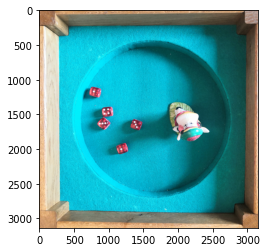

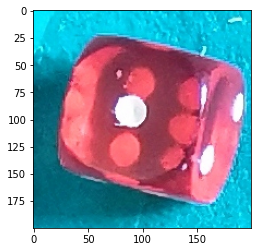

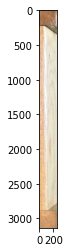

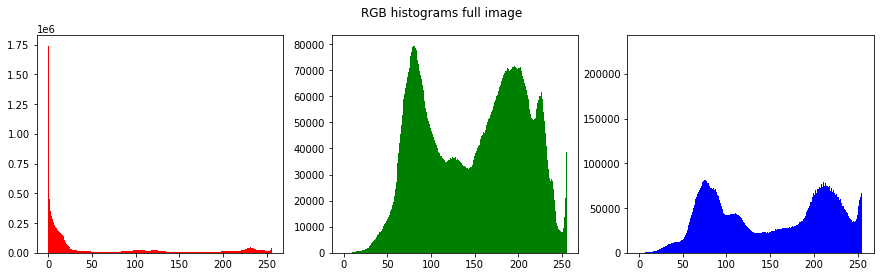

<Figure size 432x288 with 0 Axes>

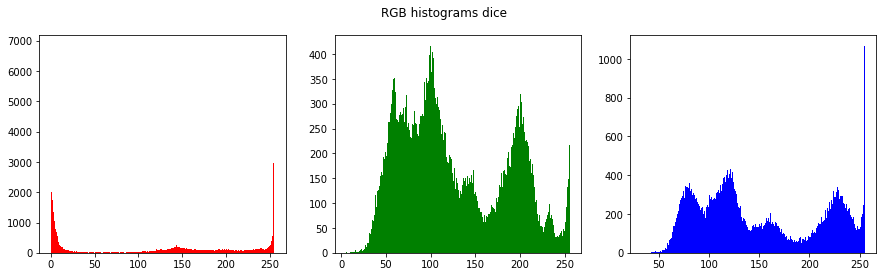

<Figure size 432x288 with 0 Axes>

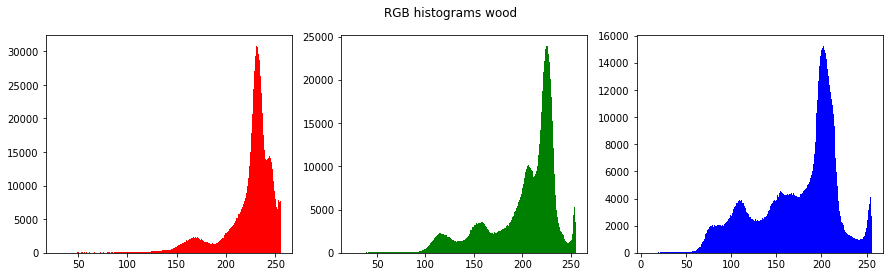

In [ ]:
ima=io.imread('ImagesTelecom/dices2.jpg')
#ima = ima[500:-500,500:-500]
plt.imshow(ima)
plt.figure()

ima2 = io.imread('ImagesTelecom/dices2.jpg')[500:-500,500:-500]
ima2 = ima2[580:780,200:400]
plt.imshow(ima2)
plt.figure()

ima3 = io.imread('ImagesTelecom/dices2.jpg')[:,:250]
plt.imshow(ima3)

### color histograms

img = ima
nbins = 255
red_histogram = skimage.exposure.histogram(ima[...,0], nbins)
green_histogram = skimage.exposure.histogram(ima[...,1], nbins)
blue_histogram = skimage.exposure.histogram(ima[...,2], nbins)
fig, axs = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("RGB histograms full image")
axs[0].bar(red_histogram[1],red_histogram[0], width = 1, color = "red")
axs[1].bar(green_histogram[1],green_histogram[0], width = 1, color = "green")
axs[2].bar(blue_histogram[1],blue_histogram[0], width = 1, color = "blue")
plt.show()

plt.figure()
img = ima2
nbins = 255
red_histogram = skimage.exposure.histogram(ima2[...,0], nbins)
green_histogram = skimage.exposure.histogram(ima2[...,1], nbins)
blue_histogram = skimage.exposure.histogram(ima2[...,2], nbins)
fig, axs = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("RGB histograms dice")
axs[0].bar(red_histogram[1],red_histogram[0], width = 1, color = "red")
axs[1].bar(green_histogram[1],green_histogram[0], width = 1, color = "green")
axs[2].bar(blue_histogram[1],blue_histogram[0], width = 1, color = "blue")
plt.show()

plt.figure()
img = ima3
nbins = 255
red_histogram = skimage.exposure.histogram(ima3[...,0], nbins)
green_histogram = skimage.exposure.histogram(ima3[...,1], nbins)
blue_histogram = skimage.exposure.histogram(ima3[...,2], nbins)
fig, axs = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("RGB histograms wood")
axs[0].bar(red_histogram[1],red_histogram[0], width = 1, color = "red")
axs[1].bar(green_histogram[1],green_histogram[0], width = 1, color = "green")
axs[2].bar(blue_histogram[1],blue_histogram[0], width = 1, color = "blue")
plt.show()


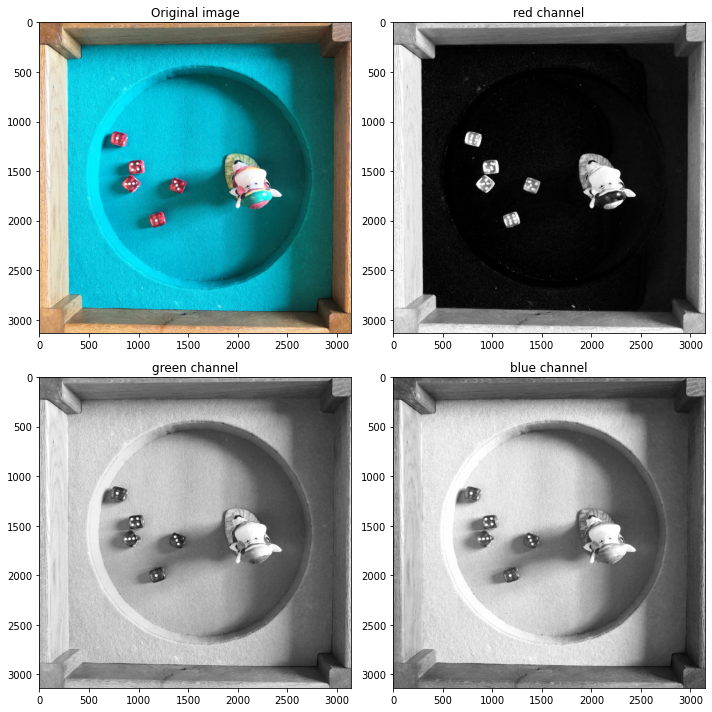

In [ ]:

# extract the three (red,green,blue) channels from imrgb and normalise between 0 and 1
imred   = ima[:,:,0]/255
imgreen = ima[:,:,1]/255
imblue  = ima[:,:,2]/255

#image size 
[nrow,ncol,nch]=ima.shape
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(ima)
axes[0,0].set_title('Original image')
axes[0, 1].imshow(imred, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()

## Isoler les dés

In [ ]:


def initialize_centroids(k):
  # create an array of size (k,3) of random values between 0 and 255
  centroids = np.random.randint(0,255, size=(k,3))
  centroids[0,:] = [255,0,0] 
  centroids[1,:] = [0,0,255] 
  centroids[2,:] = [225,225,220] 

  return(centroids)

def color_quantization_with_kmeans(imrgb,k):
  # turn the image into an array of shape (h*w,3)
  vec_img = np.reshape(imrgb, (imrgb.shape[0]* imrgb.shape[1],3))
  #fit the model on a randomly sampled subset of 1000 data points
  train_set = shuffle(vec_img)[:1000]

  centroids = initialize_centroids(k)
  kmeans = KMeans(n_clusters = k,init=centroids).fit(train_set)
  # predict the labels of each pixel
  labels = kmeans.predict(vec_img)
  # get the color values of each cluster by getting the centroids
  colors = kmeans.cluster_centers_

  return(labels,colors)

# don't modify this code
def visualize_quantization(img,shape,labels,colors):
  new_image = np.zeros(shape)
  label_matrix = labels.reshape(shape[0],shape[1])
  for i in range(shape[0]):
    for j in range(shape[1]):
      new_image[i,j,:] = colors[label_matrix[i,j]]
      
  # visualization
  fig = plt.figure(figsize=(15, 7))
  axis = fig.add_subplot(1, 2, 1)
  axis.imshow(np.uint8(new_image))
  [nrow,ncol,nch]=img.shape
  X = new_image.reshape((nrow*ncol,3))
  nb = 3000
  idx = np.random.randint(X.shape[0], size=(nb,))
  Xs = X[idx, :]/255.

  axis = fig.add_subplot(1, 2, 2, projection="3d")

  axis.set_xlabel("Red")
  axis.set_ylabel("Green")
  axis.set_zlabel("Blue")
  axis.scatter(Xs[:, 0]*255, Xs[:,1]*255,Xs[:, 2]*255,c=Xs, s=40)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


(1059480,)
(6, 3)


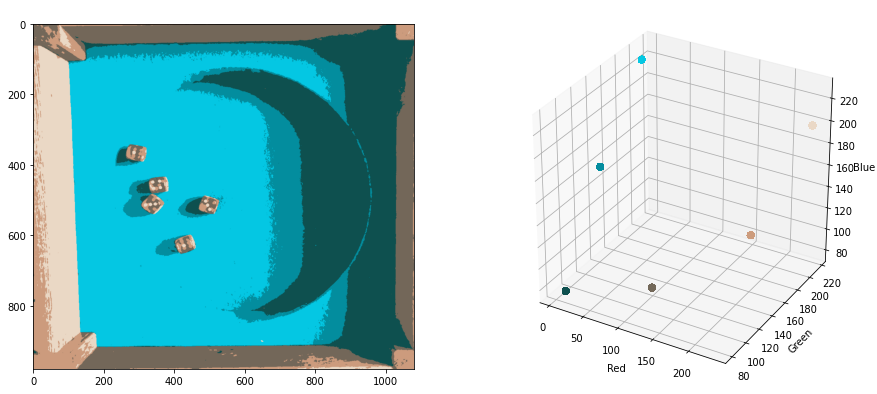

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


(9868992,)
(6, 3)


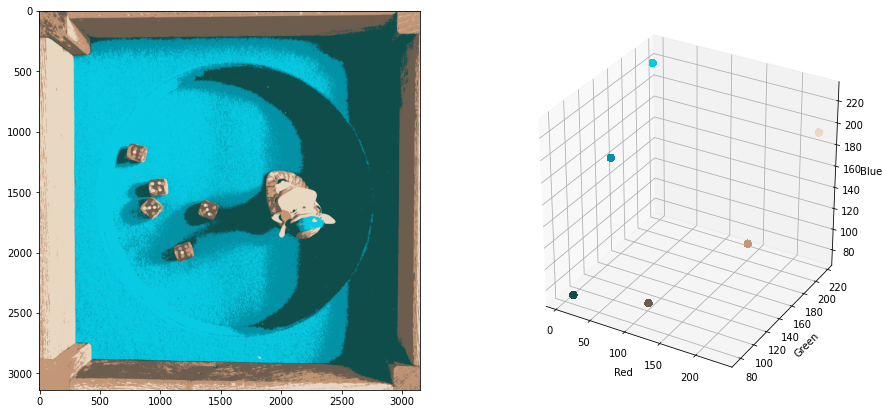

In [ ]:
ima=io.imread('ImagesTelecom/dices1.jpg')

k = 6 # number of classes

# Extract the labels and the values of the colors of each cluster
labels,colors = color_quantization_with_kmeans(ima,k)
print(labels.shape)
print(colors.shape)

# visualize the quantized image
visualize_quantization(ima, ima.shape,labels,colors) 

ima1=io.imread('ImagesTelecom/dices2.jpg')

k = 6 # number of classes

# Extract the labels and the values of the colors of each cluster
labels1,colors1 = color_quantization_with_kmeans(ima1,k)
print(labels1.shape)
print(colors1.shape)

# visualize the quantized image
visualize_quantization(ima1, ima1.shape,labels1,colors1) 

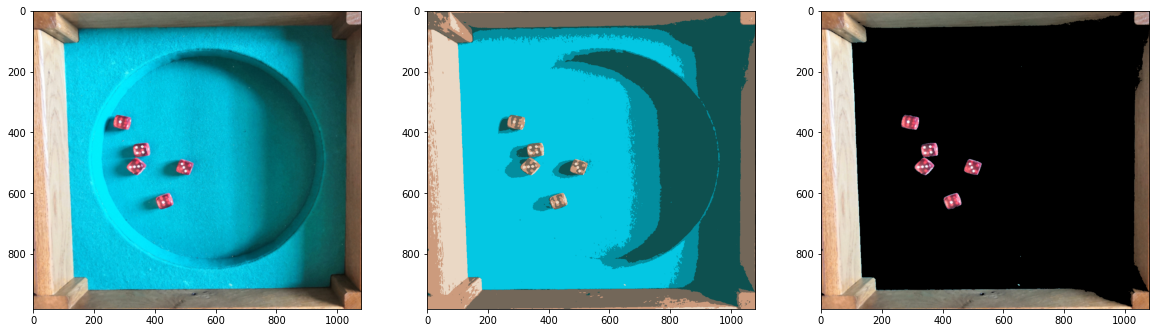

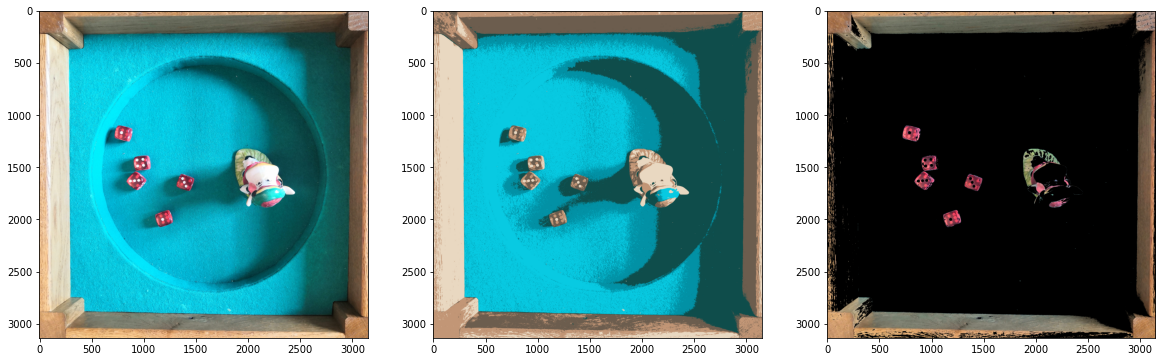

In [ ]:
tr=80
tb = 150

new_image = np.zeros(ima.shape)
new_image_2 = np.zeros(ima.shape)
label_matrix = labels.reshape(ima.shape[0],ima.shape[1])
for i in range(ima.shape[0]):
  for j in range(ima.shape[1]):
    new_image[i,j,:] = colors[label_matrix[i,j]]
    
    if colors[label_matrix[i,j]][0] > tr:
      new_image_2[i,j,:] = ima[i,j,:]
    else:
      new_image_2[i,j,:] = [0,0,0]


fig, ax = plt.subplots(1,3,figsize=(20,13))
new_image = np.uint8(new_image)
new_image_2 = np.uint8(new_image_2)

ax[0].imshow(ima)
ax[1].imshow(new_image)
ax[2].imshow(new_image_2)
plt.show()

tr=90
tb = 150

new_image = np.zeros(ima1.shape)
new_image_2 = np.zeros(ima1.shape)
label_matrix = labels1.reshape(ima1.shape[0],ima1.shape[1])
for i in range(ima1.shape[0]):
  for j in range(ima1.shape[1]):
    new_image[i,j,:] = colors1[label_matrix[i,j]]
    
    if colors1[label_matrix[i,j]][0] > tr:
      new_image_2[i,j,:] = ima1[i,j,:]
    else:
      new_image_2[i,j,:] = [0,0,0]

    if colors1[label_matrix[i,j]][2] > tb:
      new_image_2[i,j,:] = [0,0,0]


fig, ax = plt.subplots(1,3,figsize=(20,13))
new_image = np.uint8(new_image)
new_image_2 = np.uint8(new_image_2)

ax[0].imshow(ima1)
ax[1].imshow(new_image)
ax[2].imshow(new_image_2)
plt.show()


## Isoler les points

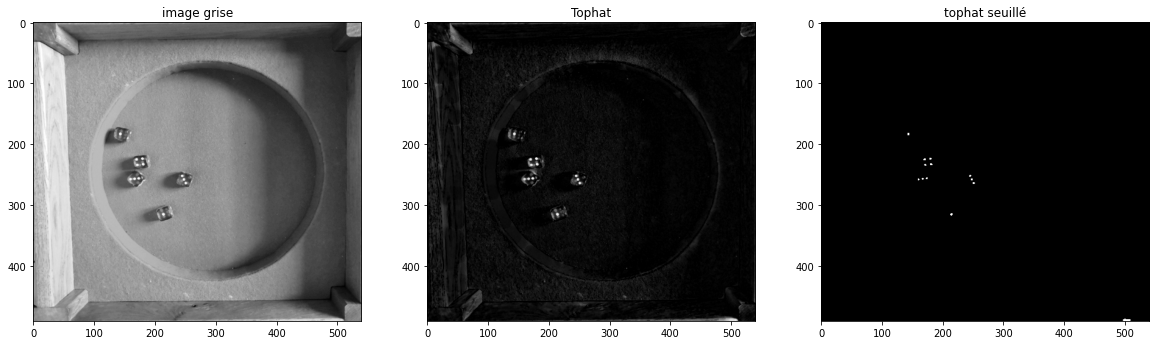

In [ ]:
import skimage.morphology as morpho

im = io.imread('ImagesTelecom/dices1.jpg')
img = im[::2 , ::2]
imred   = img[: , : , 0]/256
imgreen = img[: , : , 1]/256
imblue  = img[: , : , 2]/256
image= 0.2125*imred + 0.7154*imgreen + 0.0721*imblue

strell = morpho.disk(10)
tophat = image-morpho.opening(image,strell)

seuil = 0.6
imseuil = (tophat > seuil).astype(int)

fig, ax = plt.subplots(nrows=1, ncols=3 , figsize = (20,20))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('image grise')

ax[1].imshow(tophat, cmap='gray')
ax[1].set_title('Tophat')

ax[2].imshow(imseuil, cmap='gray')
ax[2].set_title('tophat seuillé')

plt.show()

## Compter le score

Comptage du score des dés


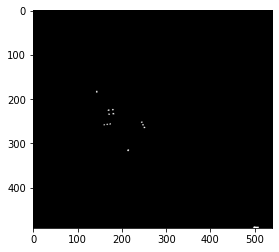

score:  12


In [ ]:
from skimage import io, filters, measure

print("Comptage du score des dés")
plt.imshow(imseuil, cmap='gray')
plt.show()

labels = measure.label(crop) # give label to each connected area in the image
nb_points = labels.max() # the label are given iteratively -> the max correspond to the number of points
print("score: ", nb_points) 
